In [ ]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import SGD
from keras import backend as K
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
batch_size = 128
num_classes = 10
epochs = 16

In [ ]:
# input image dimensions
img_rows, img_cols, color_channels = 32, 32, 3

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
x_train[0].shape, y_test[0]

((32, 32, 3), array([3], dtype=uint8))

In [ ]:
x_train = x_train.reshape(-1, 3072) # N
x_test = x_test.reshape(-1, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# normalize (0-1)
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

50000 train samples
10000 test samples


In [ ]:
# convert class vectors to binary class matrices
print(y_train[0])
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
print(y_train[0])

[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


### ANN
First, let's try an ANN

In [ ]:
ANN = Sequential()
ANN.add(Dense(5000, activation='relu', input_shape=(3072,)))
ANN.add(Dense(1000, activation='relu'))
ANN.add(Dense(200, activation='relu'))
ANN.add(Dense(50, activation='relu'))
ANN.add(Dense(num_classes, activation='softmax'))
ANN.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 5000)              15365000  
_________________________________________________________________
dense_51 (Dense)             (None, 1000)              5001000   
_________________________________________________________________
dense_52 (Dense)             (None, 200)               200200    
_________________________________________________________________
dense_53 (Dense)             (None, 50)                10050     
_________________________________________________________________
dense_54 (Dense)             (None, 10)                510       
Total params: 20,576,760
Trainable params: 20,576,760
Non-trainable params: 0
_________________________________________________________________


In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.0015) 
ANN.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
History = ANN.fit(x_train, y_train,
          batch_size=20,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/16
2500/2500 [==============================] - 16s 6ms/step - loss: 2.3395 - accuracy: 0.2467 - val_loss: 1.8066 - val_accuracy: 0.3358
Epoch 2/16
2500/2500 [==============================] - 16s 6ms/step - loss: 1.7551 - accuracy: 0.3660 - val_loss: 1.6683 - val_accuracy: 0.3904
Epoch 3/16
2500/2500 [==============================] - 15s 6ms/step - loss: 1.6729 - accuracy: 0.3948 - val_loss: 1.6144 - val_accuracy: 0.4281
Epoch 4/16
2500/2500 [==============================] - 16s 6ms/step - loss: 1.6210 - accuracy: 0.4176 - val_loss: 1.5916 - val_accuracy: 0.4339
Epoch 5/16
2500/2500 [==============================] - 15s 6ms/step - loss: 1.5791 - accuracy: 0.4333 - val_loss: 1.5584 - val_accuracy: 0.4366
Epoch 6/16
2500/2500 [==============================] - 16s 6ms/step - loss: 1.5492 - accuracy: 0.4446 - val_loss: 1.5641 - val_accuracy: 0.4485
Epoch 7/16
2500/2500 [==============================] - 15s 6ms/step - loss: 1.5221 - accuracy: 0.4560 - val_loss: 1.5630 - val_ac

In [ ]:
score = ANN.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.4934138059616089
Test accuracy: 0.4754999876022339


In [ ]:
def plot_loss(History):
  """
  Input = History, keras.callbacks.History
  Output = the loss plot is generated
  """
  plt.plot(list(range(1, len(History.history['loss']) +1)), History.history['loss'])
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Loss Plot')
  plt.show()

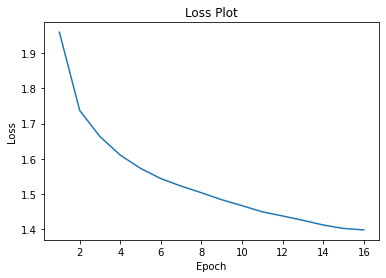

In [ ]:
plot_loss(History)

### CNN
Using a purely ANN did not work very well. Let's try a CNN instead.

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255 #without this step, calculation takes ages
x_test /= 255
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
y_train.shape

(50000, 10)

In [ ]:
CNN = Sequential()
CNN.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(32, 32, 3)))
CNN.add(tf.keras.layers.MaxPooling2D(2, 2))
CNN.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
CNN.add(tf.keras.layers.MaxPooling2D(2, 2))
CNN.add(Flatten())
CNN.add(Dense(256, activation='relu'))
CNN.add(Dense(64, activation='relu'))
CNN.add(Dense(10, activation='softmax'))

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.0015)
CNN.compile(loss='categorical_crossentropy',
              optimizer=opt, # adam, .... gradient descent
              metrics=['accuracy'])

In [ ]:
batch_size=128
H_CNN = CNN.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/16
391/391 [==============================] - 5s 9ms/step - loss: 1.7744 - accuracy: 0.3489 - val_loss: 1.2644 - val_accuracy: 0.5453
Epoch 2/16
391/391 [==============================] - 3s 8ms/step - loss: 1.1920 - accuracy: 0.5717 - val_loss: 1.0604 - val_accuracy: 0.6238
Epoch 3/16
391/391 [==============================] - 3s 8ms/step - loss: 1.0079 - accuracy: 0.6458 - val_loss: 0.9906 - val_accuracy: 0.6553
Epoch 4/16
391/391 [==============================] - 3s 8ms/step - loss: 0.8830 - accuracy: 0.6900 - val_loss: 0.9279 - val_accuracy: 0.6786
Epoch 5/16
391/391 [==============================] - 3s 8ms/step - loss: 0.7817 - accuracy: 0.7243 - val_loss: 0.8857 - val_accuracy: 0.6928
Epoch 6/16
391/391 [==============================] - 3s 8ms/step - loss: 0.7018 - accuracy: 0.7545 - val_loss: 0.9013 - val_accuracy: 0.6911
Epoch 7/16
391/391 [==============================] - 3s 8ms/step - loss: 0.6297 - accuracy: 0.7773 - val_loss: 0.8794 - val_accuracy: 0.7060
Epoch 

In [ ]:
score = CNN.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.483799934387207
Test accuracy: 0.6958000063896179


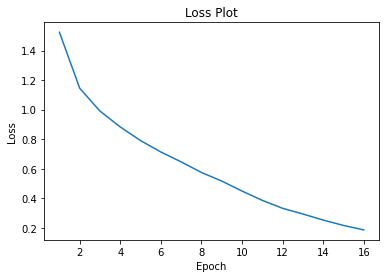

In [ ]:
plot_loss(H_CNN)

**Conclusion**: There has been a huge improvement compared to purely CNN, despite a reduction in the number of neurons and fully connected layers. Convolution and max pooling are so great =)).